In [2]:
import matplotlib.pyplot as plt
import torch as t
import torch.nn as nn
import numpy as np

In [34]:
class SimpleRNN(nn.Module):
    
    def __init__(self, n_inputs, n_hidden, nrnn_layers, n_outputs):
        super().__init__()
        self.D = n_inputs
        self.M = n_hidden
        self.K = n_outputs
        self.L = nrnn_layers
        
        
        self.rnn = nn.RNN(input_size = self.D, hidden_size = self.M, 
                         num_layers= self.L, nonlinearity = 'relu', batch_first = True)
        
        self.fc = nn.Linear(self.M, self.K)
        
        
    def forward(self, X):
            
        h0 = t.zeros(self.L, X.size(0), self.M)
            
        out, _ = self.rnn(X, h0)
            
            
            ##passing only the last time step, thats why the -1.
        out = self.fc(out[:,-1,:])
            
        return out

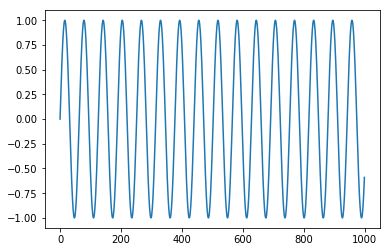

In [7]:
N = 1000
series = np.sin(0.1*np.arange(N))

plt.plot(series)
plt.show()

In [8]:
T = 10
X = []
Y = []


for i in range(len(series) - T):
    x = series[i:i+T]
    y = series[i+T]
    
    X.append(x)
    Y.append(y)

In [40]:
X = np.array(X).astype(np.float32)
Y = np.array(Y).astype(np.float32)

X = np.array(X).reshape(-1, T, 1)
Y = np.array(Y).reshape(-1, 1)

In [66]:
X.shape

(990, 10, 1)

In [41]:
model = SimpleRNN(n_inputs=1,n_hidden=5,nrnn_layers=1,n_outputs=1)

In [42]:
J = nn.MSELoss()
optimizer = t.optim.Adam(model.parameters(),lr = 0.1)

In [43]:
# Make inputs and targets
X_train = t.from_numpy(X[:-N//2].astype(np.float32))
y_train = t.from_numpy(Y[:-N//2].astype(np.float32))
X_test = t.from_numpy(X[-N//2:].astype(np.float32))
y_test = t.from_numpy(Y[-N//2:].astype(np.float32))

In [45]:
epochs = 100


train_losses = np.zeros(epochs)
test_losses = np.zeros(epochs)


for epoch in range(epochs):
    
    optimizer.zero_grad()
    
    outputs = model.forward(X_train)
    
    loss_train = J(outputs, y_train)
    
    
    train_losses[epoch] = loss_train.item()
    
    loss_train.backward()
    
    optimizer.step()
    ##################################################
    
    
    outputs_test = model.forward(X_test)
    loss_test = J(outputs_test,y_test)
    
    test_losses[epoch] = loss_test.item()
    
    

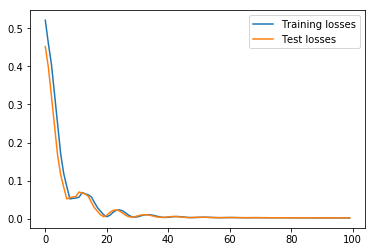

In [46]:
plt.plot(train_losses, label = 'Training losses')
plt.plot(test_losses, label = 'Test losses')
plt.legend()
plt.show()